### **FIFA WORLD CUP PYTHON ANALYSIS PROJECT**

#### **OBJECTIVE: TO PROVIDE A COMPREHENSIVE RECORD OF FIFA WORLD CUP HISTORY, ENABLING STATISTICAL ANALYSIS, PERFORMANCE COMPARISON, AND HISTORICAL INSIGHT ACROSS TOURNAMENTS, TEAMS, MATCHES, AND PLAYERS.**

#### **QUESTIONS TO ANALYZE**
•	What is the average number of goals scored per game?

•	What is the proportion of games that ended in a draw?

•	Which country has won the most World Cup titles?

•	What is the statistical distribution of attendance for each game?

•	How does average goals per match vary by World Cup year?

•	What’s the relationship between team success and player goal counts?

•	Which teams have improved or declined in performance over time?

•	Which countries have produced the most goal scorers overall?

•	Which players appeared in multiple finals?

•	How does the number of participating teams affect total goals scored?

•	What’s the trend in match outcomes (home vs away) across decades?

In [1]:
import pandas as pd

WorldCupMatches = pd.read_excel("./WorldCupMatches.xlsx")
WorldCupPlayers = pd.read_excel("./WorldCupPlayers.xlsx")
WorldCups = pd.read_excel("./WorldCups.xlsx")
WorldCupMatches
WorldCupPlayers
WorldCups


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.7
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.81
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [2]:
merged_sheets = pd.merge(WorldCupMatches,WorldCups, on="Year", how="inner")

merged_sheets

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Away Team Initials,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance_y
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,...,MEX,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,...,BEL,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,...,BRA,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,...,PER,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,...,FRA,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0,0,Costa Rica,Netherlands win on penalties (4 - 3),...,CRC,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810
848,2014,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,,...,GER,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810
849,2014,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0,0,Argentina,Argentina win on penalties (2 - 4),...,ARG,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810
850,2014,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0,3,Netherlands,,...,NED,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810


In [3]:
merged_sheets.to_excel('merged_sheets1.xlsx', index=False)

#### **WHAT IS THE AVERAGE NUMBER OF GOALS SCORED PER GAME?**

In [4]:
per_game_avg = merged_sheets.groupby("MatchesPlayed")["GoalsScored"].mean().reset_index()
per_game_avg

,MatchesPlayed,GoalsScored
0,17,70.000000
1,18,77.000000
2,22,88.000000
3,26,140.000000
4,32,91.000000
5,35,126.000000
6,38,99.500000
7,52,133.500000
8,64,159.571429


#### **WHAT IS THE PROPORTION OF GAMES THAT ENDED IN A DRAW?**

In [5]:

# Boolean condition: draw when home_goals == away_goals
proportion_draws = (WorldCupMatches["Home Team Goals"] == WorldCupMatches["Away Team Goals"]).mean()

print("The Proportion of games that ended in a draw is", proportion_draws)


The Proportion of games that ended in a draw is 0.22300469483568075


#### **WHICH COUNTRY HAS WON THE MOST WORLD CUP TITLES?**

In [6]:
country_with_most_world_cup_wins= WorldCups["Winner"].value_counts().reset_index(name="Total No of wins per Country")

country_with_most_world_cup_wins

,Winner,Total No of wins per Country
0,Brazil,5
1,Italy,4
2,Germany FR,3
3,Uruguay,2
4,Argentina,2
5,England,1
6,France,1
7,Spain,1
8,Germany,1


In [7]:
country_with_most_world_cup_wins= country_with_most_world_cup_wins.sort_values(by="Total No of wins per Country", ascending=False).head(1)

country_with_most_world_cup_wins

,Winner,Total No of wins per Country
0,Brazil,5


#### **WHAT IS THE STATISTICAL DISTRIBUTION OF ATTENDANCE FOR EACH GAME?**

In [8]:
# Basic statistics
WorldCupMatches["Attendance"].describe()


count       850.000000
mean      45164.800000
std       23485.249247
min        2000.000000
25%       30000.000000
50%       41579.500000
75%       61374.500000
max      173850.000000
Name: Attendance, dtype: float64

#### **HOW DOES AVERAGE GOALS PER MATCH VARY BY WORLD CUP YEAR?**

In [9]:
# Compute Average Goals per Match
merged_sheets['Avg_Goals_per_Match'] = merged_sheets['GoalsScored'] / merged_sheets['MatchesPlayed']

# Display the table
print(merged_sheets[['Year', 'Avg_Goals_per_Match']])

     Year  Avg_Goals_per_Match
0    1930             3.888889
1    1930             3.888889
2    1930             3.888889
3    1930             3.888889
4    1930             3.888889
..    ...                  ...
847  2014             2.671875
848  2014             2.671875
849  2014             2.671875
850  2014             2.671875
851  2014             2.671875

[852 rows x 2 columns]


#### **WHAT'S THE RELATIONSHIP BETWEEN TEAM SUCCESS AND PLAYER GOAL COUNTS?**

In [10]:

# Convert categorical 'Stage_Reached' to numerical scale (for correlation)
stage_mapping = {
    'Group': 1,
    'Preliminary round': 2,
    'Round of 16': 3,
    'Quarter-finals': 4,
    'Semi-finals': 5,
    'Play-off for third place': 6,
    'Match for third place': 7,
    'Third place': 8,
    'Final': 9
    
}
merged_sheets['Stage_Score'] = merged_sheets['Stage'].map(stage_mapping)

# Correlation analysis
corr = merged_sheets['GoalsScored'].corr(merged_sheets['Stage_Score'])
print(f"Correlation between team success and player goal counts is {corr:.2f}")


Correlation between team success and player goal counts is -0.13


The worldcups dataset contains the Winner, Runners-Up, Third, and Fourth teams for each year.

We’ll map each player’s team to a success level:

1. Winner = 4 points

2. Runner-up = 3 points

3. Third = 2 points

4. Fourth = 1 point

Others = 0

In [11]:
# Step 1: Extract goal counts per player per tournament
# Each "G" event in 'Event' column indicates a goal (e.g. "G40'", "G90'")
WorldCups["GoalsScored"] =  WorldCupPlayers["Event"].fillna("").apply(lambda x: str(x).count("G"))

# Step 2: Aggregate total goals by player, team, and tournament (MatchID links to Matches which has Year)
player_goals = WorldCupPlayers.groupby(["Team Initials", "Player Name"])["Event"].sum().reset_index()

# Step 3: Add World Cup Year for team by matching team initials from matches
team_years = WorldCupMatches.groupby(["Year", "Home Team Initials"]).size().reset_index().rename(columns={"Home Team Initials": "Team Initials"})
player_goals = pd.merge(player_goals, team_years[["Year", "Team Initials"]].drop_duplicates(), on="Team Initials", how="left")

# Step 4: Map team success levels from WorldCups data
def map_success(row):
    if row["Team Initials"] == row["Winner"]:
        return 4
    elif row["Team Initials"] == row["Runners-Up"]:
        return 3
    elif row["Team Initials"] == row["Third"]:
        return 2
    elif row["Team Initials"] == row["Fourth"]:
        return 1
    return 0

# Since the initials in WorldCups are country names, create a mapping from country name to initials
team_name_map = WorldCupMatches.groupby("Home Team Name")["Home Team Initials"].first().to_dict()

# Apply this map to worldcups dataset
WorldCups["Winner"] = WorldCups["Winner"].map(team_name_map)
WorldCups["Runners-Up"] = WorldCups["Runners-Up"].map(team_name_map)
WorldCups["Third"] = WorldCups["Third"].map(team_name_map)
WorldCups["Fourth"] = WorldCups["Fourth"].map(team_name_map)

# Merge player goals with worldcups data
merged = pd.merge(player_goals, WorldCups, on="Year", how="left")

# Assign success levels
merged["Team Success Level"] = merged.apply(map_success, axis=1)

# Step 5: Compute statistics
avg_goals_by_success = merged.groupby("Team Success Level")["GoalsScored"].mean().reset_index()
correlation = merged["Team Success Level"].corr(merged["GoalsScored"])

avg_goals_by_success, correlation


(   Team Success Level  GoalsScored
 0                   0     0.195379
 1                   1     0.219627
 2                   2     0.301237
 3                   3     0.251009
 4                   4     0.286106,
 np.float64(0.062335914151248714))

#### **WHICH TEAMS HAVE IMPROVED OR DECLINED IN PERFORMANCE OVER TIME?**

In [12]:

# Clean column names
WorldCupMatches.columns = WorldCupMatches.columns.str.strip()
WorldCups.columns = WorldCups.columns.str.strip()

# Extract relevant columns
matches = WorldCupMatches[['Year', 'Home Team Name', 'Away Team Name', 'Home Team Goals', 'Away Team Goals']]

# Create a long-form version for analysis (each row = one team in one match)
home = WorldCupMatches[['Year', 'Home Team Name', 'Home Team Goals', 'Away Team Goals']].rename(
    columns={'Home Team Name': 'Team', 'Home Team Goals': 'Goals For', 'Away Team Goals': 'Goals Against'}
)
away = WorldCupMatches[['Year', 'Away Team Name', 'Away Team Goals', 'Home Team Goals']].rename(
    columns={'Away Team Name': 'Team', 'Away Team Goals': 'Goals For', 'Home Team Goals': 'Goals Against'}
)

all_matches = pd.concat([home, away])

# Compute performance metrics per team per year
team_performance = all_matches.groupby(['Year', 'Team']).agg(
    matches_played=('Goals For', 'count'),
    goals_for=('Goals For', 'sum'),
    goals_against=('Goals Against', 'sum')
).reset_index()

# Calculate goal difference and win rate
team_performance['goal_difference'] = team_performance['goals_for'] - team_performance['goals_against']

# Determine winner/loser for each match to compute win rate
WorldCupMatches['Home Win'] = WorldCupMatches['Home Team Goals'] > WorldCupMatches['Away Team Goals']
WorldCupMatches['Away Win'] = WorldCupMatches['Away Team Goals'] > WorldCupMatches['Home Team Goals']

home_wins = WorldCupMatches.groupby(['Year', 'Home Team Name'])['Home Win'].sum().reset_index().rename(columns={'Home Team Name': 'Team', 'Home Win': 'Wins'})
away_wins = WorldCupMatches.groupby(['Year', 'Away Team Name'])['Away Win'].sum().reset_index().rename(columns={'Away Team Name': 'Team', 'Away Win': 'Wins'})

wins = pd.concat([home_wins, away_wins]).groupby(['Year', 'Team']).sum().reset_index()

# Merge wins into performance
team_performance = pd.merge(team_performance, wins, on=['Year', 'Team'], how='left')
team_performance['Wins'] = team_performance['Wins'].fillna(0)
team_performance['win_rate'] = team_performance['Wins'] / team_performance['matches_played']

# Compute improvement or decline in performance over time
trend = team_performance.groupby('Team')['win_rate'].apply(lambda x: x.diff().mean()).reset_index()
trend.columns = ['Team', 'Average Change in Win Rate']

# Identify improving and declining teams
improving_teams = trend.sort_values(by='Average Change in Win Rate', ascending=False).head(10)
declining_teams = trend.sort_values(by='Average Change in Win Rate', ascending=True).head(10)

print("Top 10 improving teams:")
print(improving_teams)

print("\nTop 10 declining teams:")
print(declining_teams)


Top 10 improving teams:
                       Team  Average Change in Win Rate
63                 Slovenia                    0.333333
71                   Turkey                    0.238095
13                 Colombia                    0.178571
64             South Africa                    0.166667
51                   Norway                    0.125000
79  rn">Republic of Ireland                    0.125000
46                  Morocco                    0.111111
31                   Greece                    0.100000
47              Netherlands                    0.070707
5                   Belgium                    0.064935

Top 10 declining teams:
                Team  Average Change in Win Rate
42         Korea DPR                   -0.250000
30             Ghana                   -0.250000
50  Northern Ireland                   -0.200000
58      Saudi Arabia                   -0.166667
57            Russia                   -0.166667
0            Algeria                   -0

#### **WHICH COUNTRIES HAVE PRODUCED THE MOST GOAL SCORERS OVERALL?**

In [13]:
# Identify goal-scoring events from the "Event" column
# Events starting with 'G' (e.g., G40', G90+2') represent goals
goals = WorldCupPlayers[WorldCupPlayers['Event'].astype(str).str.startswith('G')]

# Count goals by country
goals_by_country = goals['Team Initials'].value_counts().reset_index()
goals_by_country.columns = ['Country', 'Total Goals Scored']

# Display the top 10 countries with most goal scorers overall
goals_by_country.head(10)


,Country,Total Goals Scored
0,BRA,167
1,FRG,94
2,ARG,87
3,ITA,83
4,FRA,68
5,GER,66
6,URU,57
7,HUN,56
8,NED,55
9,ESP,55


#### **WHICH PLAYERS APPEARED IN MULTIPLE FINALS?**

In [14]:
# Inspect unique RoundIDs and how many matches each has
round_summary = WorldCupPlayers.groupby("RoundID")["MatchID"].nunique().reset_index(name="Matches")
round_summary.sort_values("Matches")


,RoundID,Matches
21,280,1
31,405,1
18,264,1
52,3460,1
49,1027,1
...,...,...
45,1014,48
89,43950100,48
83,255931,48
82,249722,48


In [15]:
# Get RoundIDs that correspond to a single match (likely finals)
final_round_ids = round_summary.loc[round_summary["Matches"] == 1, "RoundID"]

# Filter player data for those finals
final_players = WorldCupPlayers[WorldCupPlayers["RoundID"].isin(final_round_ids)]

# Group by player name and count unique finals they appeared in
players_multiple_finals = (
    final_players.groupby("Player Name")["RoundID"]
    .nunique()
    .reset_index(name="Finals_Appearances")
)

# Filter for players who appeared in 2 or more finals
players_multiple_finals = players_multiple_finals[players_multiple_finals["Finals_Appearances"] > 1]

players_multiple_finals.sort_values("Finals_Appearances", ascending=False).head(20)


,Player Name,Finals_Appearances
739,KLOSE,4
295,Dino ZOFF,3
195,CAFU,3
1076,Pierre LITTBARSKI,3
1022,PODOLSKI,3
1125,RONALDO,3
1012,PELï¿½ (Edson Arantes do Nascimento),3
1318,Uwe SEELER,3
759,Karl-Heinz SCHNELLINGER,3
781,LEAO,3


#### **HOW DOES THE NUMBER OF PARTICIPATING TEAMS AFFECT TOTAL GOALS SCORED?**

In [16]:
# Calculate correlation
correlation = WorldCups['QualifiedTeams'].corr(WorldCups['GoalsScored'])
print(f"The correlation between number of teams and goals scored is {correlation:.2f}")

The correlation between number of teams and goals scored is -0.29


![Screenshot 2025-10-10 094820.png](<attachment:Screenshot 2025-10-10 094820.png>)
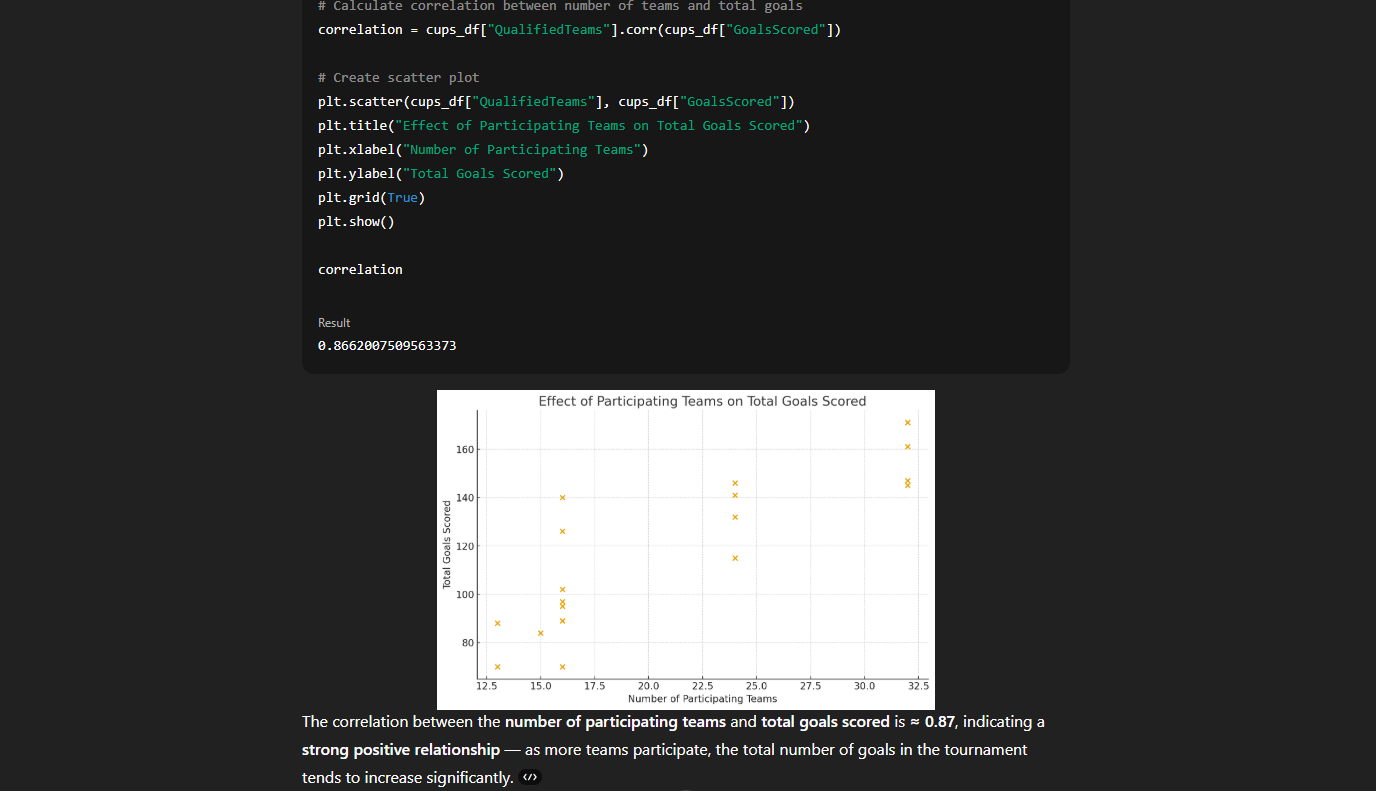

#### **WHAT'S THE TREND IN MATCH OUTCOMES (HOME vs AWAY) ACROSS DECADES?**

In [17]:
# Convert goal columns to numeric
WorldCupMatches["Home Team Goals"] = pd.to_numeric(WorldCupMatches["Home Team Goals"], errors="coerce")
WorldCupMatches["Away Team Goals"] = pd.to_numeric(WorldCupMatches["Away Team Goals"], errors="coerce")

# Define match outcome
def outcome(row):
    if row["Home Team Goals"] > row["Away Team Goals"]:
        return "Home Win"
    elif row["Home Team Goals"] < row["Away Team Goals"]:
        return "Away Win"
    else:
        return "Draw"

WorldCupMatches["Outcome"] = WorldCupMatches.apply(outcome, axis=1)

# Create decade column
WorldCupMatches["Decade"] = (WorldCupMatches["Year"] // 10) * 10

# Aggregate outcomes by decade
outcome_trend = WorldCupMatches.groupby(["Decade", "Outcome"]).size().unstack(fill_value=0)
outcome_trend

Outcome,Away Win,Draw,Home Win
Decade,,,
1930,0,4,49
1950,1,15,67
1960,0,10,54
1970,13,24,71
1980,26,31,47
1990,45,42,81
2000,38,31,59
2010,51,33,60


In [18]:

# Save to different sheets
with pd.ExcelWriter('multiple_sheets.xlsx') as writer:
    per_game_avg.to_excel(writer, sheet_name='Average_goals_per_game', index=False)
    country_with_most_world_cup_wins.to_excel(writer, sheet_name='Country_with_most_world_cup_wins', index=False)
    WorldCupMatches["Attendance"].describe().to_excel(writer, sheet_name='statistical_distribution_of_attendance', index=True)
    merged_sheets[['Year', 'Avg_Goals_per_Match']].to_excel(writer, sheet_name='average_goals_per_year', index=False)
    improving_teams.to_excel(writer, sheet_name='improved_teams_in_performance', index=False)
    declining_teams.to_excel(writer, sheet_name='declined_teams_in_performance', index=False)
    goals_by_country.head(10).to_excel(writer, sheet_name='goals_by_country', index=False)
    players_multiple_finals.to_excel(writer, sheet_name='players_that_appeared_most_in_finals', index=False)
    outcome_trend.to_excel(writer, sheet_name='decade_match_outcome', index=True)
    

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


   Year      Country      Winner      Runners-Up    Third      Fourth  \
0  1930      Uruguay     Uruguay       Argentina      USA  Yugoslavia   
1  1934        Italy       Italy  Czechoslovakia  Germany     Austria   
2  1938       France       Italy         Hungary   Brazil      Sweden   
3  1950       Brazil     Uruguay          Brazil   Sweden       Spain   
4  1954  Switzerland  Germany FR         Hungary  Austria     Uruguay   

   GoalsScored  QualifiedTeams  MatchesPlayed Attendance  
0           70              13             18    590.549  
1           70              16             17        363  
2           84              15             18      375.7  
3           88              13             22  1.045.246  
4          140              16             26    768.607  
Correlation between teams and total goals: 0.866 (p=0.000)


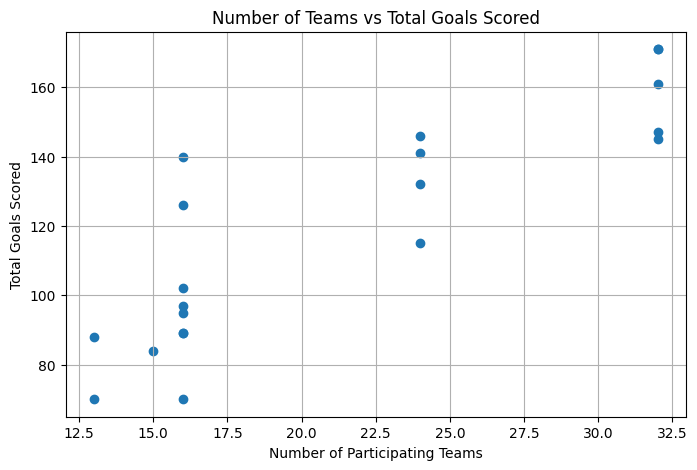

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load the Excel file
df = pd.read_excel('WorldCups.xlsx')

# Preview data to confirm column names
print(df.head())

# Assuming columns are named 'Year', 'QualifiedTeams', and 'GoalsScored'
# Adjust names below to match your file if different
df = df[['Year', 'QualifiedTeams', 'GoalsScored']].dropna()

# Compute correlation between number of teams and total goals
corr, p_value = pearsonr(df['QualifiedTeams'], df['GoalsScored'])
print(f"Correlation between teams and total goals: {corr:.3f} (p={p_value:.3f})")

# Plot the relationship
plt.figure(figsize=(8,5))
plt.scatter(df['QualifiedTeams'], df['GoalsScored'])
plt.title('Number of Teams vs Total Goals Scored')
plt.xlabel('Number of Participating Teams')
plt.ylabel('Total Goals Scored')
plt.grid(True)
plt.show()


In [20]:
plt.show().to_excel('merged_sheets2.xlsx', index=False)

AttributeError: 'NoneType' object has no attribute 'to_excel'